In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
# CIFAR-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

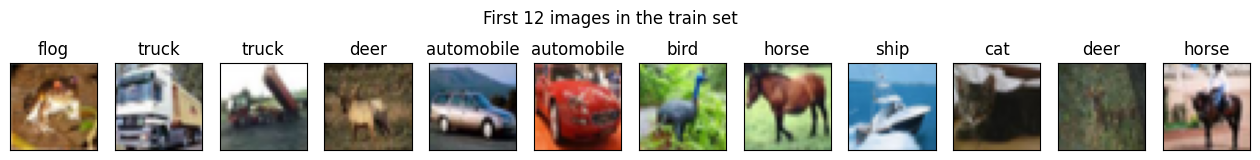

In [4]:
# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[np.argmax(y_train[i])])

In [5]:
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

Epoch 1/10
391/391 - 180s - 460ms/step - accuracy: 0.4011 - loss: 1.6270 - val_accuracy: 0.5222 - val_loss: 1.3242
Epoch 2/10
391/391 - 200s - 512ms/step - accuracy: 0.5475 - loss: 1.2597 - val_accuracy: 0.5867 - val_loss: 1.1477
Epoch 3/10
391/391 - 205s - 524ms/step - accuracy: 0.6125 - loss: 1.0886 - val_accuracy: 0.6687 - val_loss: 0.9521
Epoch 4/10
391/391 - 202s - 518ms/step - accuracy: 0.6547 - loss: 0.9797 - val_accuracy: 0.6853 - val_loss: 0.8997
Epoch 5/10
391/391 - 179s - 457ms/step - accuracy: 0.6872 - loss: 0.8926 - val_accuracy: 0.7194 - val_loss: 0.8107
Epoch 6/10
391/391 - 200s - 512ms/step - accuracy: 0.7060 - loss: 0.8413 - val_accuracy: 0.7270 - val_loss: 0.7784
Epoch 7/10
391/391 - 204s - 521ms/step - accuracy: 0.7253 - loss: 0.7807 - val_accuracy: 0.7451 - val_loss: 0.7288
Epoch 8/10
391/391 - 203s - 519ms/step - accuracy: 0.7391 - loss: 0.7455 - val_accuracy: 0.7546 - val_loss: 0.7167
Epoch 9/10
391/391 - 200s - 512ms/step - accuracy: 0.7508 - loss: 0.7101 - val_a

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,671,232 (10.19 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,780,822 (6.79 MB)

In [7]:
for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


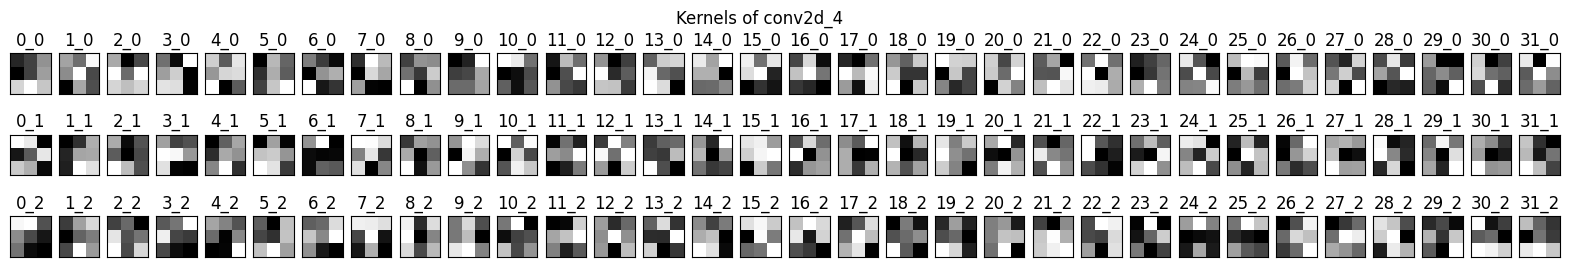

In [8]:
#학습해놓은 커널이 이렇게 됨
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()
#R거 G거 B거 각각 32개
#conv2d의 커널 출력

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


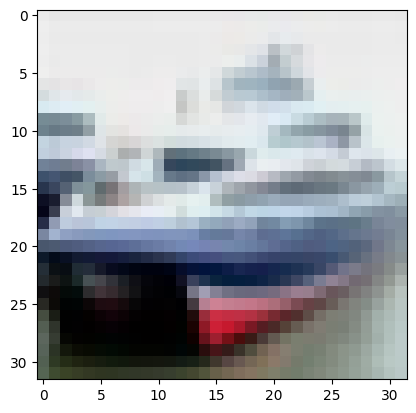

In [9]:
for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄, 입력은 원래 모델과 같고 출력은 cnn의  0번째 데이터의 output을 짤라내서 partial모델 만들기, conv2d (Conv2D) 짤라냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

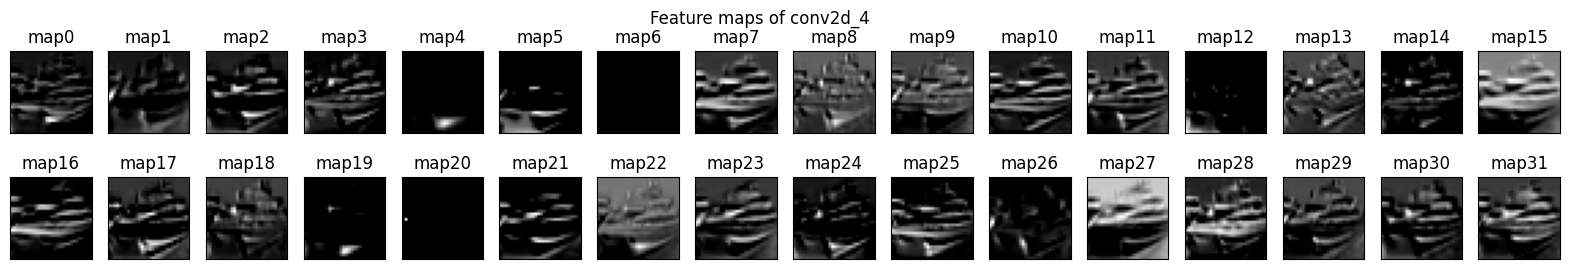

In [10]:
plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4") #RGB 다 합하기 -> 32개
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

In [11]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# 부분 모델: 입력 -> 두 번째 Conv 층 출력
partial_model2 = Model(inputs=cnn.inputs, outputs=cnn.layers[1].output)
partial_model2.summary()

# 테스트셋에서 1번 이미지의 feature map 얻기
feature_map2 = partial_model2.predict(x_test)
fm2 = feature_map2[1]   # 두 번째 이미지의 feature map
print(fm2.shape)        # (28, 28, 32) 예상

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
(28, 28, 32)


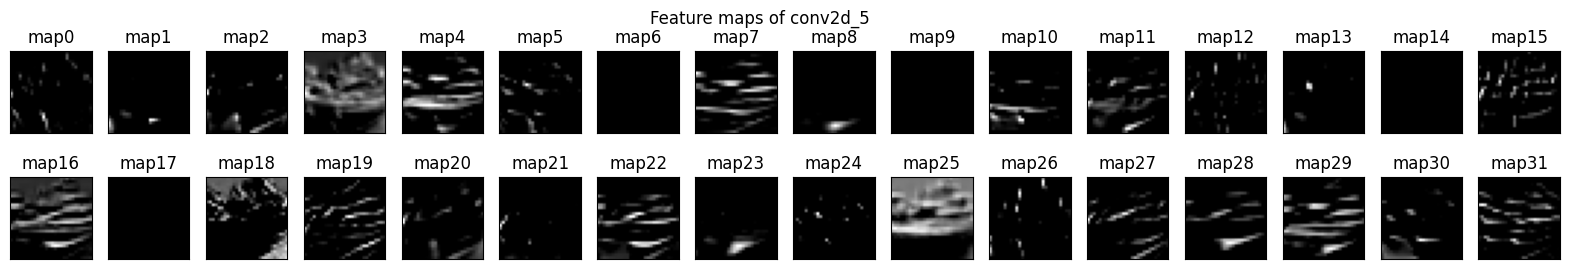

In [12]:
plt.figure(figsize=(20, 3))
plt.suptitle("Feature maps of conv2d_5")  # 두 번째 Conv 층 이름
for i in range(32):  # 32개의 채널
    plt.subplot(2, 16, i+1)
    plt.imshow(fm2[:, :, i], cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()
#고급 특징 추출

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


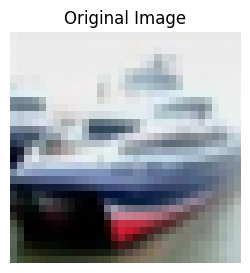

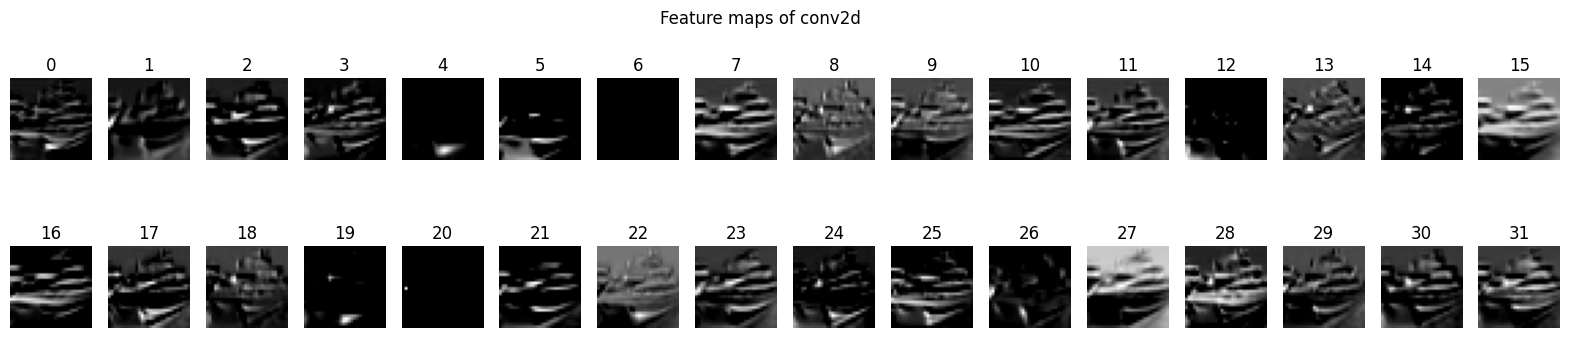

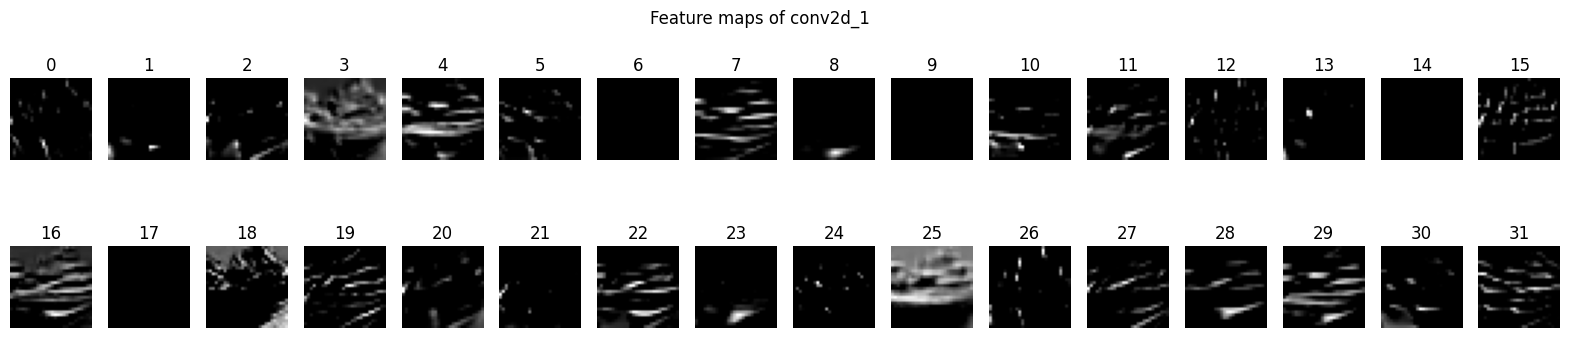

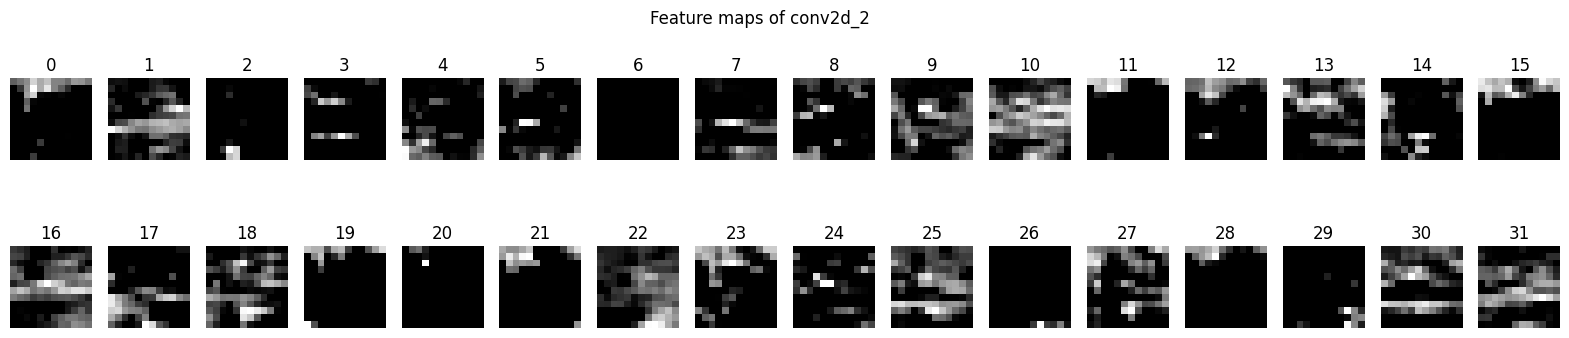

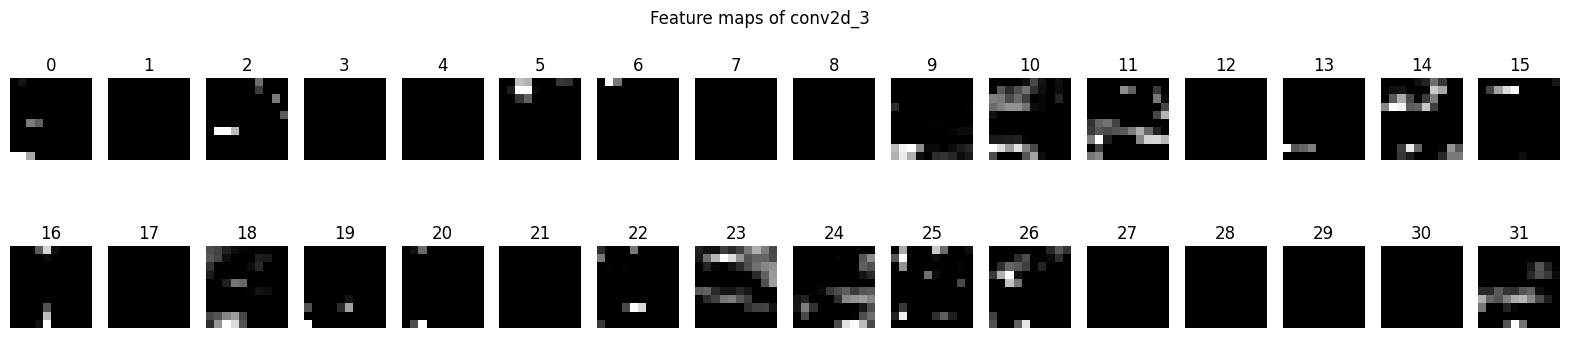

In [13]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# 비교할 Conv 층 인덱스 (0, 1, 4번이 Conv2D)
layer_indices = [0, 1, 4, 5] #5번이 우리가 원하는거

# 부분 모델 만들기: 입력 → 각 Conv 층 출력
outputs = [cnn.layers[i].output for i in layer_indices]
multi_model = Model(inputs=cnn.inputs, outputs=outputs)

# 테스트셋 1번 이미지 넣기
feature_maps = multi_model.predict(x_test[1:2])  # (1, H, W, C) 유지해야 함

# 원본 이미지 출력
plt.figure(figsize=(3,3))
plt.imshow(x_test[1])
plt.axis('off')
plt.title("Original Image")
plt.show()

# 각 Conv 층 feature map 시각화
for idx, fm in zip(layer_indices, feature_maps):
    fm = fm[0]  # 배치 차원 제거 → (H, W, C)
    n_features = fm.shape[-1]

    plt.figure(figsize=(20, 4))
    plt.suptitle(f"Feature maps of {cnn.layers[idx].name}")
    for i in range(min(n_features, 32)):  # 최대 32개만 보기
        plt.subplot(2, 16, i+1)
        plt.imshow(fm[:, :, i], cmap='gray')
        plt.axis('off')
        plt.title(str(i))
    plt.show()
